                                                            Import

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import t

                                                            DATA VISUALISATION

In [36]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [37]:
df = keras.utils.image_dataset_from_directory(
   'apple' , image_size=(256,256), batch_size = 32, shuffle= True
)

Found 4645 files belonging to 4 classes.


In [38]:
dir(df)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '

In [39]:
classes= df.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']

In [40]:
len(df)

146

In [41]:
df.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
for image, label in df.take(1):
    print(image.shape)
    print(label.numpy())
    print(len(label))

(32, 256, 256, 3)
[1 3 3 3 3 1 3 1 0 3 0 1 2 3 3 1 0 3 0 1 2 2 3 3 1 2 1 0 2 2 3 0]
32


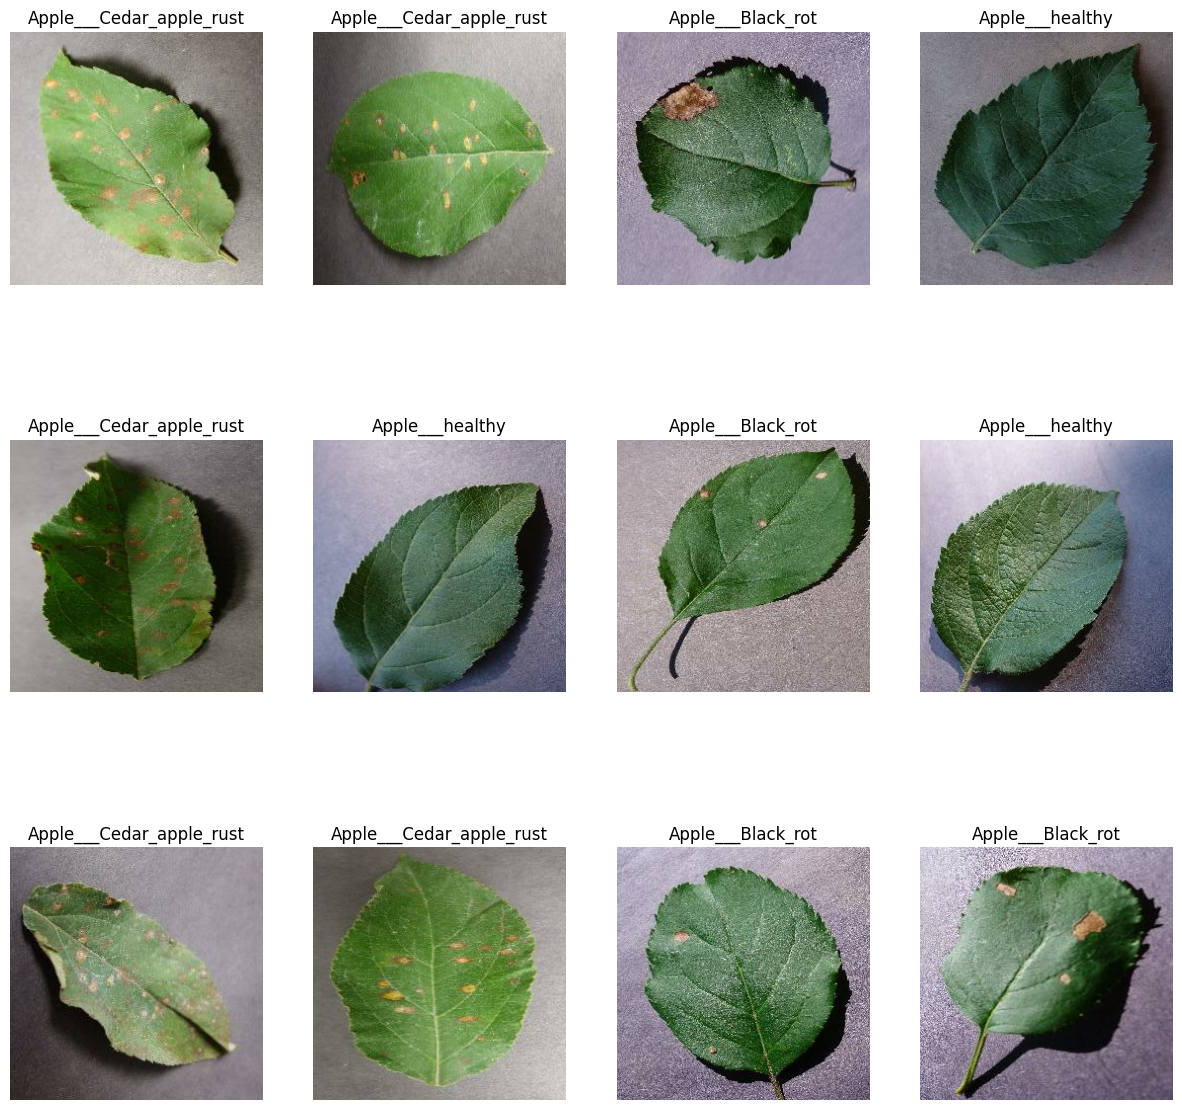

In [101]:
plt.figure(figsize=(15, 15))
for im,l in df.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.title(classes[l[i]])
        plt.axis('off')

                                                                        Spliting 

In [73]:
#3 values = train , validate, test

In [78]:
num_df= len(df)
num_df

146

In [77]:
train_size= 0.8

In [81]:
train_data= num_df*train_size

In [82]:
train_data

116.80000000000001

In [83]:
train_df= df.take(116)

In [93]:
len(train_df)

116

In [94]:
dir(train_df)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_count',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_sa

In [97]:
type(train_df)

tensorflow.python.data.ops.take_op._TakeDataset

In [100]:
test_df = df.skip(116)
len(test_df)

30

In [106]:
len(test_df)

30

In [104]:
len(test_df)+len(train_df)== len(df)

True

In [105]:
val_size = 0.1
len(df)*val_size

14.600000000000001

In [107]:
val_df= test_df.skip(15)

In [108]:
len(val_df)

15

In [109]:
len(test_df)

30

In [110]:
test_df= test_df.skip(15)

In [111]:
len(test_df)

15